In [1]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '소화제 부작용.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
result = f.read()
f.close()

In [3]:
def tokenizer(raw, stopword = []):
    return [word for word in okt.nouns(raw)
            if word not in stopword]

data = tokenizer(result)

In [4]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [5]:
print(X)

  (0, 6079)	1
  (1, 2284)	1
  (2, 1186)	1
  (3, 6079)	1
  (4, 4127)	1
  (7, 1109)	1
  (8, 6079)	1
  (9, 3356)	1
  (11, 1851)	1
  (13, 5070)	1
  (14, 2882)	1
  (16, 1851)	1
  (17, 6079)	1
  (19, 141)	1
  (22, 2872)	1
  (23, 6079)	1
  (24, 4729)	1
  (25, 3011)	1
  (26, 327)	1
  (27, 4864)	1
  (30, 2834)	1
  (31, 2353)	1
  (32, 4864)	1
  (33, 3920)	1
  (34, 5070)	1
  :	:
  (81741, 4024)	1
  (81743, 4021)	1
  (81744, 5413)	1
  (81745, 1910)	1
  (81746, 4192)	1
  (81747, 4024)	1
  (81750, 4864)	1
  (81751, 3310)	1
  (81752, 5767)	1
  (81753, 2834)	1
  (81754, 4024)	1
  (81755, 4904)	1
  (81756, 2893)	1
  (81757, 2714)	1
  (81758, 5811)	1
  (81759, 2227)	1
  (81760, 4553)	1
  (81762, 1975)	1
  (81764, 4864)	1
  (81765, 310)	1
  (81766, 1947)	1
  (81768, 4059)	1
  (81769, 2003)	1
  (81770, 233)	1
  (81772, 5233)	1


In [6]:
print(vectorize.vocabulary_)

{'화제': 6079, '부작용': 2284, '대해': 1186, '이야기': 4127, '답변': 1109, '알약': 3356, '물약': 1851, '처방': 5070, '수도': 2882, '감초': 141, '수가': 2872, '종류': 4729, '습관': 3011, '계속': 327, '증상': 4864, '소화': 2834, '불량': 2353, '위해': 3920, '유즙': 3980, '경우': 310, '의사': 4050, '선생님': 2678, '상의': 2585, '체중': 5122, '감소': 130, '미국': 1866, '위염': 3900, '여행': 3572, '자고': 4309, '지옥': 4912, '온몸': 3717, '두통': 1316, '열도': 3612, '살짝': 2547, '제인': 4661, '펩토': 5621, '비즈': 2424, '사서': 2480, '갑자기': 148, '삼십분': 2554, '정도': 4568, '지나': 4881, '구토': 556, '자리': 4326, '빈속': 2438, '가요': 51, '나니': 815, '조금': 4685, '먹기': 1652, '오기': 3673, '원래': 3851, '음식': 4024, '한식': 5839, '적응': 4484, '하나요': 5781, '곳도': 414, '의심': 4055, '수프': 2927, '병원': 2151, '치료': 5233, '오전': 3700, '학교': 5812, '시험': 3074, '인지': 4203, '화장실': 6077, '임시': 4275, '방편': 2031, '해결': 5911, '보건': 2156, '바로': 1920, '복용': 2219, '이름': 4094, '정량': 4571, '빨간색': 2445, '냄새': 900, '이후': 4167, '위액': 3897, '분비': 2322, '트름': 5508, '설사': 2696, '방법': 2005, '네이버': 915, '지식': 4906, '상담': 

In [7]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
tfidf = TfidfTransformer(use_idf = True, norm='l2', smooth_idf = True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'화제': 1421,
 '부작용': 1125,
 '대해': 110,
 '이야기': 34,
 '답변': 81,
 '알약': 72,
 '물약': 23,
 '처방': 309,
 '수도': 130,
 '감초': 30,
 '수가': 29,
 '종류': 117,
 '습관': 133,
 '계속': 129,
 '증상': 615,
 '소화': 1417,
 '불량': 459,
 '위해': 118,
 '유즙': 45,
 '경우': 646,
 '의사': 150,
 '선생님': 19,
 '상의': 37,
 '체중': 29,
 '감소': 88,
 '미국': 51,
 '위염': 221,
 '여행': 18,
 '자고': 11,
 '지옥': 1,
 '온몸': 13,
 '두통': 72,
 '열도': 2,
 '살짝': 7,
 '제인': 18,
 '펩토': 1,
 '비즈': 1,
 '사서': 14,
 '갑자기': 38,
 '삼십분': 1,
 '정도': 252,
 '지나': 9,
 '구토': 167,
 '자리': 6,
 '빈속': 20,
 '가요': 22,
 '나니': 4,
 '조금': 70,
 '먹기': 43,
 '오기': 2,
 '원래': 35,
 '음식': 360,
 '한식': 1,
 '적응': 9,
 '하나요': 10,
 '곳도': 2,
 '의심': 27,
 '수프': 1,
 '병원': 206,
 '치료': 313,
 '오전': 7,
 '학교': 8,
 '시험': 11,
 '인지': 27,
 '화장실': 29,
 '임시': 2,
 '방편': 2,
 '해결': 73,
 '보건': 7,
 '바로': 94,
 '복용': 1064,
 '이름': 24,
 '정량': 8,
 '빨간색': 2,
 '냄새': 30,
 '이후': 36,
 '위액': 22,
 '분비': 327,
 '트름': 10,
 '설사': 239,
 '방법': 152,
 '네이버': 73,
 '지식': 77,
 '상담': 124,
 '약사': 130,
 '익환': 5,
 '문의': 35,
 '질문': 68,
 '라면': 49,
 '중정

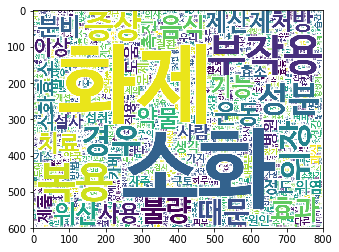

In [11]:
from wordcloud import WordCloud

w = WordCloud(font_path = '/Users/leesoyeon/Downloads/NanumBarunGothicBold.ttf', width=800, height=600, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
plt.show()

In [12]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'화제': 6079, '부작용': 2284, '대해': 1186, '이야기': 4127, '답변': 1109, '알약': 3356, '물약': 1851, '처방': 5070, '수도': 2882, '감초': 141, '수가': 2872, '종류': 4729, '습관': 3011, '계속': 327, '증상': 4864, '소화': 2834, '불량': 2353, '위해': 3920, '유즙': 3980, '경우': 310, '의사': 4050, '선생님': 2678, '상의': 2585, '체중': 5122, '감소': 130, '미국': 1866, '위염': 3900, '여행': 3572, '자고': 4309, '지옥': 4912, '온몸': 3717, '두통': 1316, '열도': 3612, '살짝': 2547, '제인': 4661, '펩토': 5621, '비즈': 2424, '사서': 2480, '갑자기': 148, '삼십분': 2554, '정도': 4568, '지나': 4881, '구토': 556, '자리': 4326, '빈속': 2438, '가요': 51, '나니': 815, '조금': 4685, '먹기': 1652, '오기': 3673, '원래': 3851, '음식': 4024, '한식': 5839, '적응': 4484, '하나요': 5781, '곳도': 414, '의심': 4055, '수프': 2927, '병원': 2151, '치료': 5233, '오전': 3700, '학교': 5812, '시험': 3074, '인지': 4203, '화장실': 6077, '임시': 4275, '방편': 2031, '해결': 5911, '보건': 2156, '바로': 1920, '복용': 2219, '이름': 4094, '정량': 4571, '빨간색': 2445, '냄새': 900, '이후': 4167, '위액': 3897, '분비': 2322, '트름': 5508, '설사': 2696, '방법': 2005, '네이버': 915, '지식': 4906, '상담': 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict(freqs_TFIDF)

{'화제': 1421.0,
 '부작용': 1125.0,
 '대해': 110.0,
 '이야기': 34.0,
 '답변': 81.0,
 '알약': 72.0,
 '물약': 23.0,
 '처방': 309.0,
 '수도': 130.0,
 '감초': 30.0,
 '수가': 29.0,
 '종류': 117.0,
 '습관': 133.0,
 '계속': 129.0,
 '증상': 615.0,
 '소화': 1417.0,
 '불량': 459.0,
 '위해': 118.0,
 '유즙': 45.0,
 '경우': 646.0,
 '의사': 150.0,
 '선생님': 19.0,
 '상의': 37.0,
 '체중': 29.0,
 '감소': 88.0,
 '미국': 51.0,
 '위염': 221.0,
 '여행': 18.0,
 '자고': 11.0,
 '지옥': 1.0,
 '온몸': 13.0,
 '두통': 72.0,
 '열도': 2.0,
 '살짝': 7.0,
 '제인': 18.0,
 '펩토': 1.0,
 '비즈': 1.0,
 '사서': 14.0,
 '갑자기': 38.0,
 '삼십분': 1.0,
 '정도': 252.0,
 '지나': 9.0,
 '구토': 167.0,
 '자리': 6.0,
 '빈속': 20.0,
 '가요': 22.0,
 '나니': 4.0,
 '조금': 70.0,
 '먹기': 43.0,
 '오기': 2.0,
 '원래': 35.0,
 '음식': 360.0,
 '한식': 1.0,
 '적응': 9.0,
 '하나요': 10.0,
 '곳도': 2.0,
 '의심': 27.0,
 '수프': 1.0,
 '병원': 206.0,
 '치료': 313.0,
 '오전': 7.0,
 '학교': 8.0,
 '시험': 11.0,
 '인지': 27.0,
 '화장실': 29.0,
 '임시': 2.0,
 '방편': 2.0,
 '해결': 73.0,
 '보건': 7.0,
 '바로': 94.0,
 '복용': 1064.0,
 '이름': 24.0,
 '정량': 8.0,
 '빨간색': 2.0,
 '냄새': 30.0,
 '이후': 36.0,


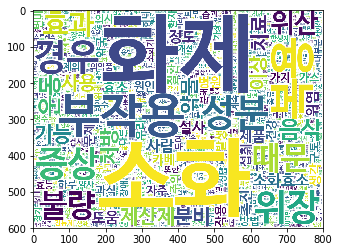

In [17]:
w1 = WordCloud(font_path = '/Users/leesoyeon/Downloads/NanumBarunGothicBold.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()